#**BigMart Sales Prediction**

## **Problem Statement**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.


##**Project Goal**
To build a predictive model and find out the sales of each product at a particular store.

### **Needed Modules**
Now we will import the libraries or modules we'll need in our project

In [1]:
#for data manipulation
import numpy as np
import pandas as pd

#for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#splitting the data
from sklearn.model_selection import train_test_split

#for feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#for models evaluation metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### **Data Reading, Exploring and Preparation**

In [2]:
#import the training dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Technocolabs Internship/Test Project/Train.csv')
#view the top rows
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#reading our dataset size
data.shape

(8523, 12)

In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
#import the testing dataset
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Technocolabs Internship/Test Project/Test.csv')
#view the top rows
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
#reviewing the info of both the training and testing data
data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

In [7]:
#lets check if there are any missing values
data.isnull().sum(), test_data.isnull().sum()

(Item_Identifier                 0
 Item_Weight                  1463
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  2410
 Outlet_Location_Type            0
 Outlet_Type                     0
 Item_Outlet_Sales               0
 dtype: int64,
 Item_Identifier                 0
 Item_Weight                   976
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  1606
 Outlet_Location_Type            0
 Outlet_Type                     0
 dtype: int64)

In [8]:
#Since we have missing values, let's see their percentage in our data
(data.isnull().sum()/data.shape[0]) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [9]:
(test_data.isnull().sum()/test_data.shape[0]) * 100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

Both datasets have the same percentage of missing values also, in the same features..

As our dataset only consists of about **8500** records, deleting the rows that has **null** values will not be the most proper action. The dataset is not that big and getting rid of these records might have significant effect.

So, we're going to try to fill these empty cells with appropriate methods. We have two columns/ features that have missing values, one with numerical values (**Item_Weight**), and the other has categorical values (**Outlet_Size**).

Let's firstly work with **Item_Weight**. We can take a look at the data distribution to see how spreaded our data points are and to figure out if there are any outliers.

The best way to visualize the above is using ***Box Plots***

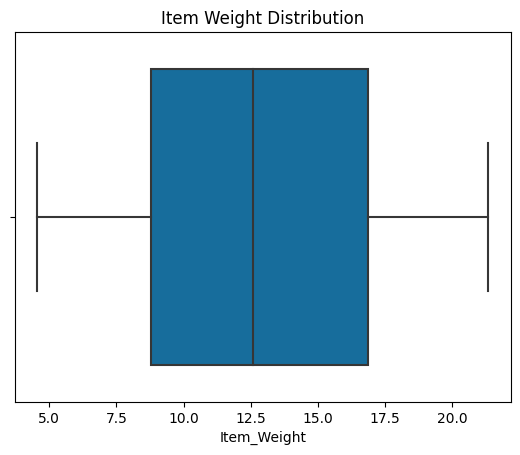

In [10]:
sns.boxplot(x=data.Item_Weight, palette='colorblind')
plt.title("Item Weight Distribution");

Since we did not notice any outliers in our weights, filling the missing rows with the ***mean*** will be the most realistic solution.

Having a not so wide range of values also supports this finding.

In [11]:
#let's firstly find the mean
weights_mean = round(data.Item_Weight.mean(),2)
weights_mean

12.86

In [12]:
#Almost as expected.. Now we'll fill the missing values with it
data.Item_Weight.fillna(weights_mean, inplace=True)
#Checking for missing values again
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Let's do the same for the testing data..

In [13]:
test_data.Item_Weight.fillna(round(test_data.Item_Weight.mean(),2), inplace=True)
#Checking for missing values again
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Let's move now to the other feature with missing values, ***Outlet_Size***. We can have a quick overview about the unique values and how frequently each one exists. For categorical values, the most used or usual way to fill the missing values is using the ***mode***, which is the most repeated value, let's see if it would be applicable in our case.


In [14]:
#we can view the values using value_counts() method in pandas dataframes
data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
#checking the percentage of every value
(data.Outlet_Size.value_counts()/data.shape[0])*100

Medium    32.770151
Small     28.018303
High      10.935117
Name: Outlet_Size, dtype: float64

Having the above results, it will never be realistic at all to fill the missing values using the ***mode***. Because the numbers of each of the value's repititions are so close. It would not be fair to easily assume that all the missing records are **Medium**. So we have to guess another solution.

*We can do it* 💪

To do it simple and quick, I used MS Excel ***Pivot Table*** function  on our training data, as follows below:
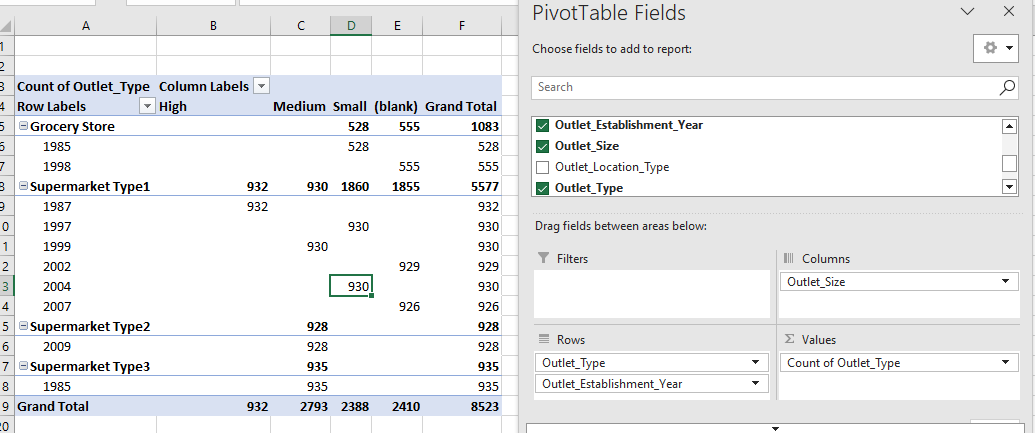

From our table, we can reach this summay:


*   All *Grocery Store* outlets are *Small* so, we're going to fill all the missing *Sizes* that are corresponding to a *Grocery Store* with *Small*
*   We do not actually need any data manipulation for Supermarkets of *Type2* and *Type3*, they are all *Medium* and there are no missing values.

*   For *Supermarket Type1* it's a bit complicated but, using *Establishment Years* to divide the table to another level, I reached some observation. The **BigMart** follows the pattern of: **High -> Small -> Medium** when opening new stores all over the years plus, they focus on one size of *Oultlets* each year they are launching.

*   Hoping our observation was highly accurate, I will fill the missing *Sizes* for **2002** with **High**, and for **2007** with **Medium**.

By the way, the same patterns take place in our testing dataset, as in the below screenshot, so, we'll follow the same steps when preprocessing it later..







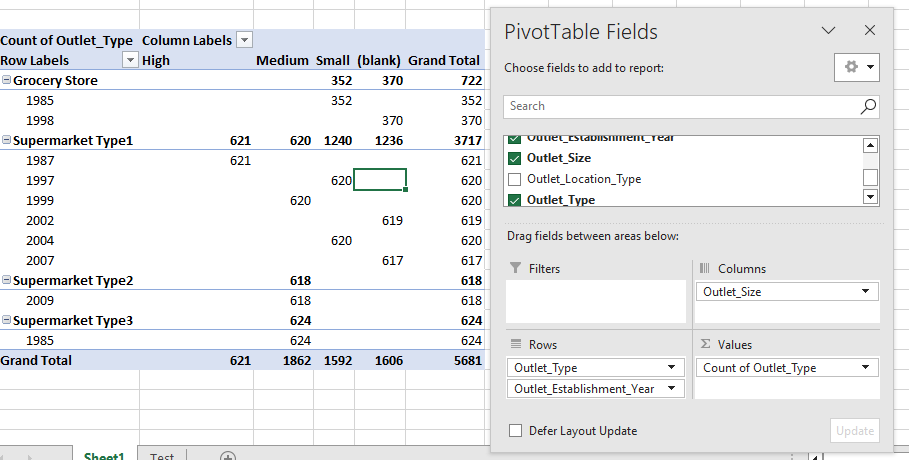

In [16]:
#To fill the grocery stores size
for row in range(len(data)):
  if data.loc[row,'Outlet_Type'] == 'Grocery Store':
    data.loc[row,'Outlet_Size'] = 'Small'
#To check the missing values were reduced
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
#The same for test data
for row in range(len(test_data)):
  if test_data.loc[row,'Outlet_Type'] == 'Grocery Store':
    test_data.loc[row,'Outlet_Size'] = 'Small'
#To check the missing values were reduced
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1236
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [18]:
#To fill the type1 stores size
for row in range(len(data)):
  if (data.loc[row,'Outlet_Type'] == 'Supermarket Type1' and data.loc[row,'Outlet_Establishment_Year'] == 2002):
    data.loc[row,'Outlet_Size'] = 'High'
  if (data.loc[row,'Outlet_Type'] == 'Supermarket Type1' and data.loc[row,'Outlet_Establishment_Year'] == 2007):
    data.loc[row,'Outlet_Size'] = 'Medium'
#To check the missing values were reduced
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
#To fill the type1 stores size
for row in range(len(test_data)):
  if (test_data.loc[row,'Outlet_Type'] == 'Supermarket Type1' and test_data.loc[row,'Outlet_Establishment_Year'] == 2002):
    test_data.loc[row,'Outlet_Size'] = 'High'
  if (test_data.loc[row,'Outlet_Type'] == 'Supermarket Type1' and test_data.loc[row,'Outlet_Establishment_Year'] == 2007):
    test_data.loc[row,'Outlet_Size'] = 'Medium'
#To check the missing values were reduced
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

After handling our data's missing values, let's go check for duplicates..

In [20]:
data.duplicated().sum(), test_data.duplicated().sum()

(0, 0)

And we're clear of duplicate records..

Now, we'll move to cleaning our categorical data. The features that are believed to be checked on are: ***Item_Fat_Content*** and ***Item_Type***. The others are just identifiers plus, the ***Outlet_Size*** and ***Outlet_Type*** that were previously viewed and taken care of..

So let's start with ***Item_Fat_Content***:

In [21]:
#we can begin with checking the unique values in the column
data.Item_Fat_Content.unique(), test_data.Item_Fat_Content.unique()

(array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object),
 array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object))

As we see, some of the people responsible for providing our data did not follow the same criteria when providing typical info, such as, referring to the **Low Fat** products with 3 different expressions as above. So, we should unify the three of them under one word/expression.

In [22]:
#we can easily do this using pandas replace() method
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(to_replace=['low fat', 'LF'], value='Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(to_replace=['reg'], value='Regular')
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [23]:
#Test data
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(to_replace=['low fat', 'LF'], value='Low Fat')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(to_replace=['reg'], value='Regular')
test_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

Checking on the other two categorical variables..

In [24]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [25]:
test_data.Item_Type.unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

Everything seems normal with no duplications nor spelling mistakes..

Let's go check for outliers in our numerical features: **Item_Visibility**, **Item_MRP** and **Item_Outlet_Sales**. And of course we had the **Item_Weight** checked.

Let's start with the **Item_Visibility**, again using *Box Plot*:

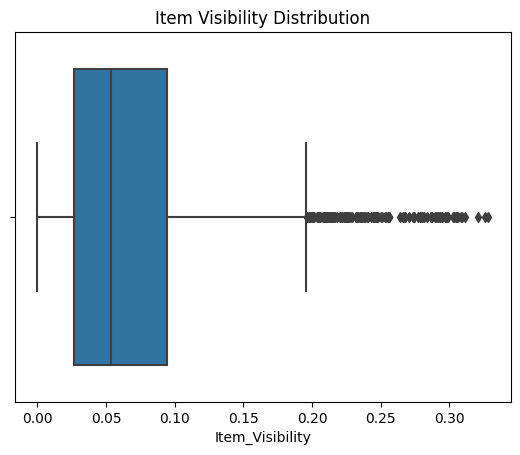

In [26]:
sns.boxplot(x=data.Item_Visibility)
plt.title('Item Visibility Distribution');

As it's so obvious that our column has a lot of *Outliers*, we need to pay attention that the range of data is just between **0** and **1**. Also our column is just representing a propability of how much an item might be seen for a customer. So, we'll just keep the data as it was, as it's meaningless to either delete or edit it..

Moving on to the next feature, **Item_MRP**:

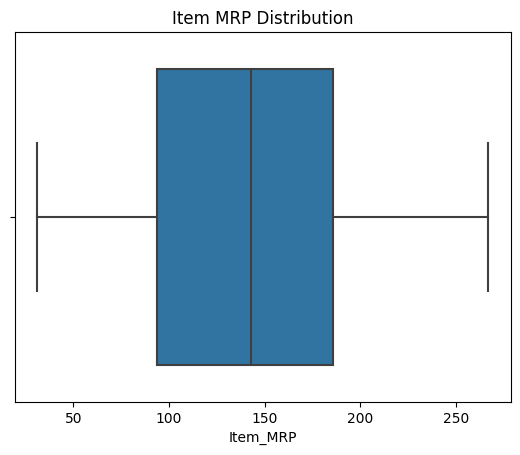

In [27]:
sns.boxplot(x=data.Item_MRP)
plt.title('Item MRP Distribution');

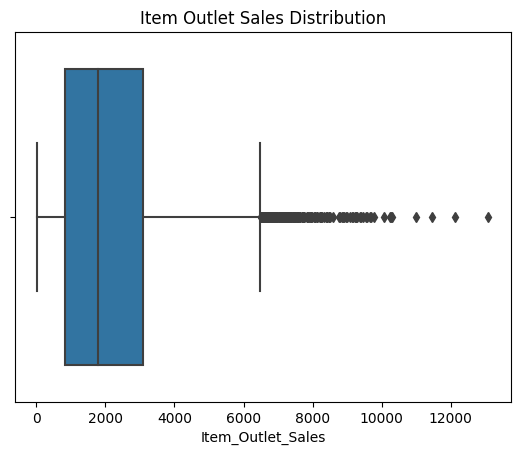

In [28]:
sns.boxplot(x=data.Item_Outlet_Sales)
plt.title('Item Outlet Sales Distribution');

In [29]:
#let's discover the IQR
def remove_outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit, Q1, Q3
#upper and lower ranges
upper, lower, Q1, Q3 = remove_outliers(data, "Item_Outlet_Sales")
lower, Q1, Q3, upper

(-2566.3261, 834.2474, 3101.2964, 6501.8699)

In [30]:
#let's see how much is above the upper limit
len(data[data['Item_Outlet_Sales'] > upper])

186

In [31]:
len(data[data['Item_Outlet_Sales'] < lower])

0

Since both amounts of points beyond our limits are so small, we can just drop them out..

In [32]:
#both are negligible
data=data[data['Item_Outlet_Sales'] < upper]

We can also check the total **Sales** per each year..

In [33]:
p=data.groupby('Outlet_Establishment_Year')[['Item_Outlet_Sales']].sum().sort_values(by='Item_Outlet_Sales', ascending = False)
p

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,2.821188e+06
2004,2.153951e+06
1999,2.106249e+06
1997,2.042211e+06
1987,2.033081e+06
2007,2.025425e+06
2002,1.966751e+06
2009,1.831713e+06
1998,1.883402e+05


Let's visulaize the above for more clear insights..

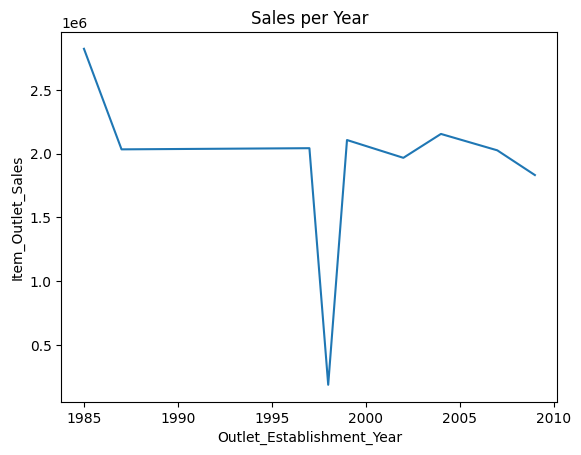

In [34]:
sns.lineplot(p, x=p.index, y=p.Item_Outlet_Sales)
plt.title('Sales per Year');

This should give an alert to the BigMart management as the sales are either still or decreasing over the years..

To have a deeper look on our data, we can perform some ***Univarite*** and ***Bivariate Analysis***..

###**Univariate Analysis**






*   *Count of Sales per Item Type*



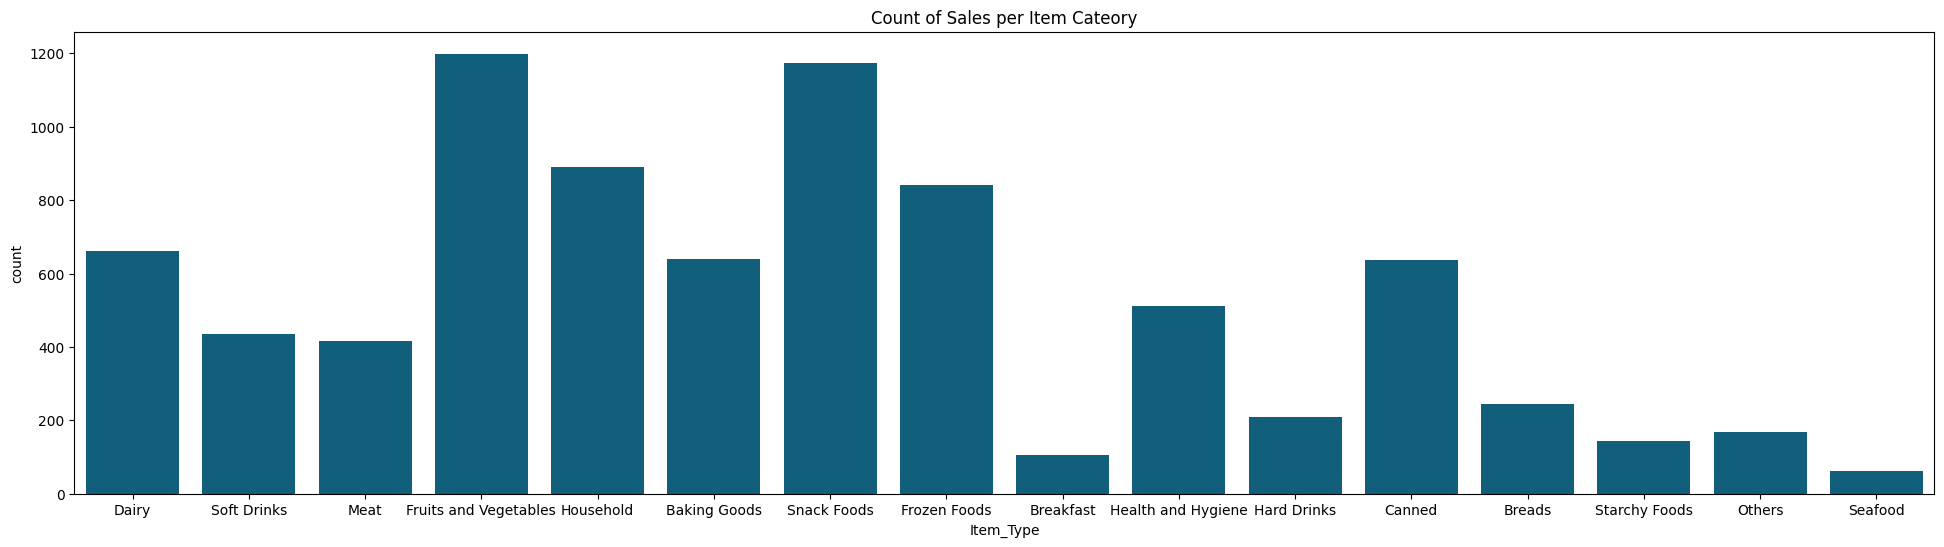

In [35]:
plt.figure(figsize=(24,6))
sns.countplot(x=data.Item_Type, color='#00688B');
plt.title('Count of Sales per Item Cateory');

Looks like *Fruits and Vegetables* and *Snack Foods* are our top items which makes sense.

* *Count of each Outlet Type*

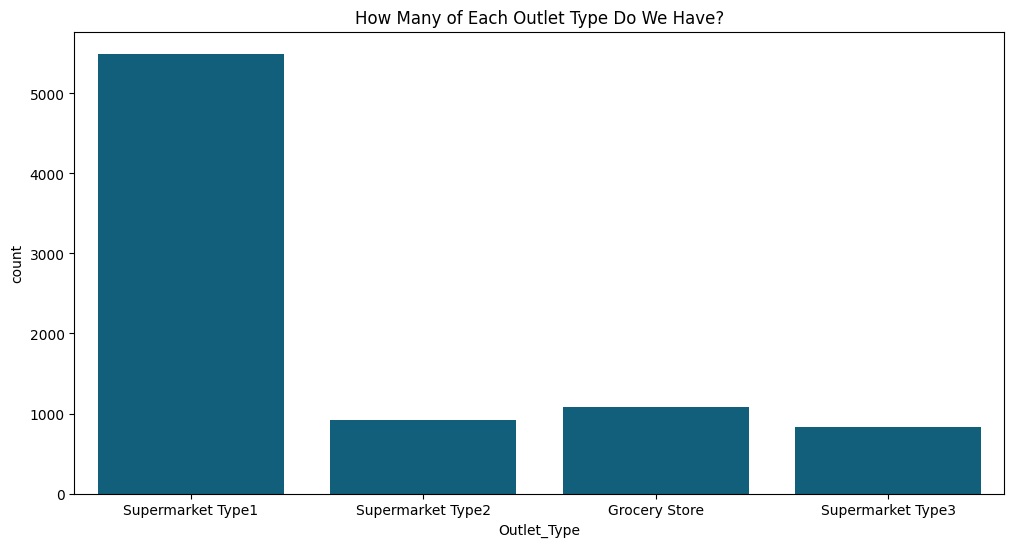

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x=data.Outlet_Type, color='#00688B');
plt.title('How Many of Each Outlet Type Do We Have?');

The above plot is supposed to explain the expected to see big difference in sales when we check on it per **Outlet_Type**.

* *Count of Outlets per Size*

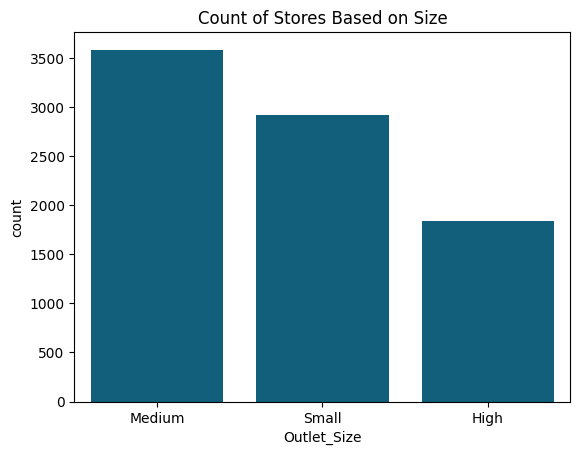

In [37]:
sns.countplot(x=data.Outlet_Size, color='#00688B');
plt.title('Count of Stores Based on Size');

The company is more likely to invest in way more in *Small* and *Medium* stores rather than *High* ones. Does this reflects on *Sales per Outlet Size*? Let's find out!

### **Bivariate Analysis**

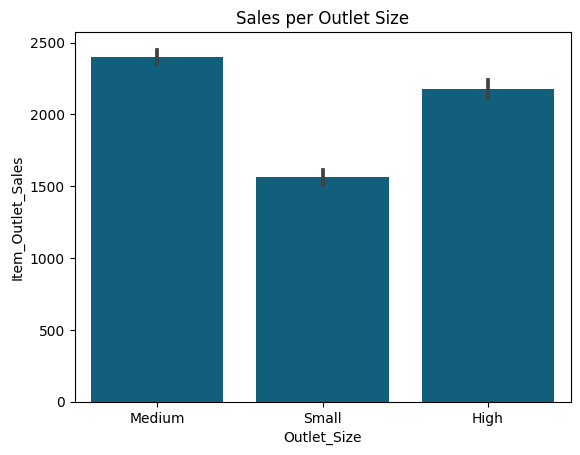

In [38]:
sns.barplot(data, x=data.Outlet_Size, y=data.Item_Outlet_Sales, color='#00688B')
plt.title('Sales per Outlet Size');

So, the answer to our previous question is definetley, No! Despite the *High* size count is way less than the other two, it still acheives high sales to the company.

Let us check if this somehow related to the average of prices ***Item_MRP*** at each kind of store..

In [39]:
data.groupby('Outlet_Size')[['Item_MRP']].mean().sort_values(by='Item_MRP', ascending=False)

,Item_MRP
Outlet_Size,
Small,140.949433
High,139.973693
Medium,137.288533


So, the *Small* stores have the highest average of prices but not high enough to compete the other types in the total revenue..

Going on with investigating how our *Sales* are achieved, let's see how much do we sell per ***Item_Type***

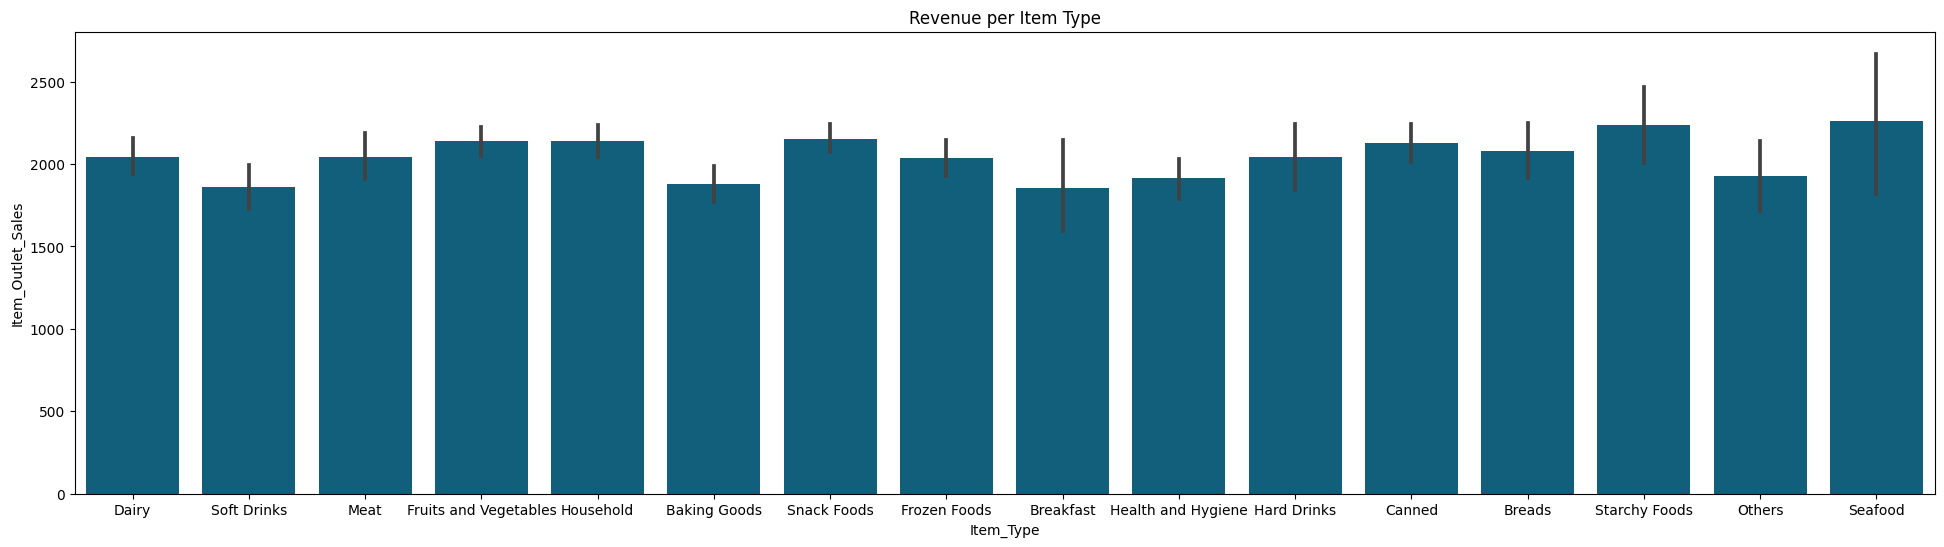

In [40]:
plt.figure(figsize=(24,6))
sns.barplot(data, x=data.Item_Type, y=data.Item_Outlet_Sales, color='#00688B')
plt.title('Revenue per Item Type');

WOW! Despite *Seafood* came least in terms of number of *Sales*, it's coming first now in the revenue entered to the company per item.

Let us discover our top 3 selling stores and which Tier do they belong to..

In [41]:
data.groupby(['Outlet_Identifier', 'Outlet_Location_Type'])[['Item_Outlet_Sales']].sum().sort_values(by='Item_Outlet_Sales', ascending = False).head(3)

,,Item_Outlet_Sales
Outlet_Identifier,Outlet_Location_Type,
OUT027,Tier 3,2.641494e+06
OUT035,Tier 2,2.153951e+06
OUT049,Tier 1,2.106249e+06


Looks like the ***Tier*** the store belongs to does not make much difference in the Revenue. To double check, let's check the Revenue per each ***Tier***

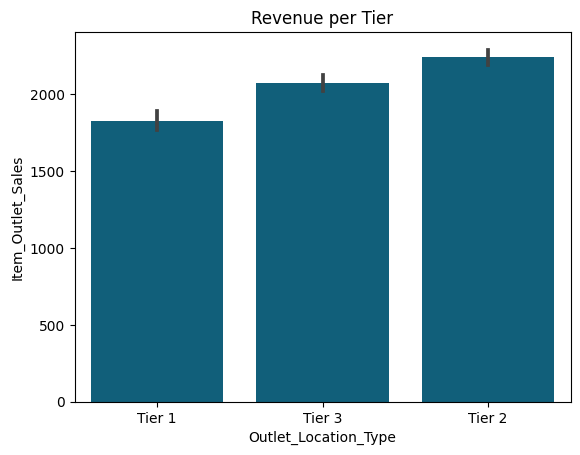

In [42]:
sns.barplot(data, x=data.Outlet_Location_Type, y=data.Item_Outlet_Sales, color='#00688B')
plt.title('Revenue per Tier');

Just as expected, no big difference noted!

Let's finally check the relevancy between ***Item_Visibility*** and Revenue


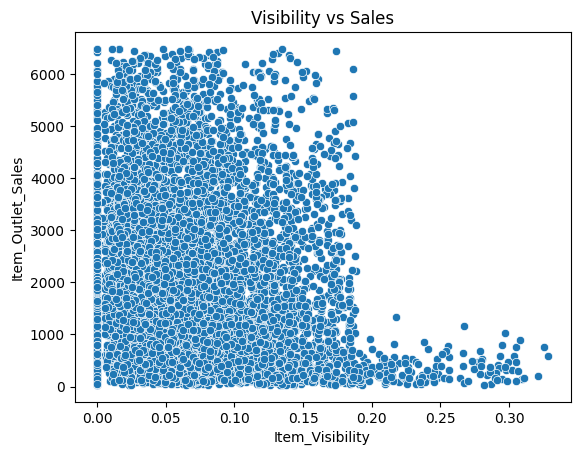

In [43]:
sns.scatterplot(data, x='Item_Visibility', y='Item_Outlet_Sales')
plt.title('Visibility vs Sales');

I can call the above visualization, scary! Because if the revenue decreases when the items visibility increases, even if this applies on a small range of the data, there must be something wrong. Maybe the planning team of the stores need to reorganize and reallocate the goods in the stores.

### **Encoding Categorical Values**

When transforming categorical variables into numerical ones we follow these methods:


*   For Ordinal data, we use ***Label Encoding***
*   For Nominal data, we use ***One Hot Encoding***



#### **Label Encoding**

In [44]:
ordinals = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Establishment_Year']
le = LabelEncoder()

for col in ordinals:
  data[col] = le.fit_transform(data[col])

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,4,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,8,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,4,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,3,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1,0,2,1,994.7052


In [45]:
#Repeating for test data
for col in ordinals:
  test_data[col] = le.fit_transform(test_data[col])

test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,4,1,0,1
1,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,7,1,1,1
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,3,2,2,0
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,7,1,1,1
4,FDY38,12.700,1,0.118599,Dairy,234.2300,OUT027,0,1,2,3


#### **One Hot Encoding**

In [46]:
nominals = ['Item_Type']
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(ohe.fit_transform(data[nominals])).astype('int64')

#get feature columns
data_oh.columns = ohe.get_feature_names_out(nominals)
#One-hot encoding removed index; put it back
data_oh.index = data.index

#Data after feature engineering
data_fe = pd.concat([data, data_oh], axis=1)
data_fe.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,8,1,2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,4,1,0,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,3,2,2,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1,0,2,...,0,0,0,1,0,0,0,0,0,0


In [47]:
#Getting our testing features encoded
test_data_oh = pd.DataFrame(ohe.fit_transform(test_data[nominals])).astype('int64')
test_data_oh.columns = ohe.get_feature_names_out(nominals)
test_data_oh.index = test_data.index
test_data_fe = pd.concat([test_data, test_data_oh], axis=1)
test_data_fe.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,4,1,0,...,0,0,0,0,0,0,0,1,0,0
1,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,7,1,1,...,0,0,0,0,0,0,0,0,0,0
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,3,2,2,...,0,0,0,0,0,1,0,0,0,0
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,7,1,1,...,0,0,0,0,0,0,0,1,0,0
4,FDY38,12.700,1,0.118599,Dairy,234.2300,OUT027,0,1,2,...,0,0,0,0,0,0,0,0,0,0


Since **Item_Identifier** and **Outlet_Identifier** are just IDs for the items and stores, respectively, we can just drop them.  

In [48]:
data_fe= data_fe.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
data_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,Dairy,249.8092,4,1,0,1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,Soft Drinks,48.2692,8,1,2,2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,Meat,141.6180,4,1,0,1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,3,2,2,0,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,Household,53.8614,1,0,2,1,994.7052,...,0,0,0,1,0,0,0,0,0,0


We can also drop the **Item_Type** as we already have a column for each type after encoding..

In [49]:
data_fe= data_fe.drop(['Item_Type'], axis=1)
data_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,4,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,8,1,2,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,4,1,0,1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,3,2,2,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1,0,2,1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


Let's not forget our testing data..

In [50]:
test_data_fe= test_data_fe.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier'], axis=1)
test_data_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750,0,0.007565,107.8622,4,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8.300,1,0.038428,87.3198,7,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600,0,0.099575,241.7538,3,2,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315,0,0.015388,155.0340,7,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,12.700,1,0.118599,234.2300,0,1,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0


Before moving to the **Modeling** step, we need to rescale our numerical values, that are not encoded of course, for better model performance..

In [51]:
numericals = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

sc = StandardScaler()
for col in numericals:
  data_fe[col] = sc.fit_transform(data_fe[[col]])
data_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,-0.836916,0,-0.970594,1.797705,4,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.632181,1,-0.908262,-1.476724,8,1,2,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,1.092426,0,-0.956843,0.039918,4,1,0,1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,1.492411,1,-1.280179,0.697549,3,2,2,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.923972,0,-1.280179,-1.385868,1,0,2,1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
#numericals.remove('Item_Outlet_Sales')
for col in numericals:
  test_data_fe[col] = sc.fit_transform(test_data_fe[[col]])
test_data_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,1.897283,0,-1.134077,-0.536555,4,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.035707,1,-0.531850,-0.868937,7,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.448457,0,0.661316,1.629848,3,2,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-1.267754,0,-0.981416,0.226697,7,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.000852,1,1.032540,1.508110,0,1,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0


##**Train and Test Split**

In [53]:
y= data_fe['Item_Outlet_Sales']
X= data_fe.drop('Item_Outlet_Sales', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
6670,-1.503950,0,2.740247,2.049196,3,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2257,-0.283995,0,-0.497348,0.797127,4,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2991,1.857104,0,-1.134492,-0.519887,6,2,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1357,-0.719273,0,-0.370015,-0.645974,6,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4367,1.139483,0,-0.702704,0.486120,6,2,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,0.000701,1,-1.029866,-0.376569,0,1,2,3,0,0,...,1,0,0,0,0,0,0,0,0,0
5310,-1.081613,0,-0.169231,-0.412312,3,2,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5516,-1.236901,1,1.464935,0.522890,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
884,0.000701,0,0.078713,-0.426892,0,1,2,3,0,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
X_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
3552,0.000701,1,-0.996167,0.884735,0,1,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2360,0.998311,1,-0.377145,0.037737,2,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8159,1.233597,0,2.167201,0.321167,8,1,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
958,-1.174551,0,-0.095548,0.441782,7,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5483,-1.513362,0,-0.056431,-0.102332,8,1,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,1.586525,0,-0.497869,-1.520549,3,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5058,0.000701,0,0.055000,2.029699,0,1,2,3,0,0,...,0,0,1,0,0,0,0,0,0,0
1131,0.000701,1,2.235544,-0.519887,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565,-1.479245,0,-0.006620,1.958853,1,0,2,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [56]:
y_train

6670     264.9884
2257    1304.9680
2991    1693.7952
1357    2428.8384
4367    5201.2296
          ...    
5869    2994.7684
5310     115.1834
5516    3238.4512
884     2942.8360
7433    3896.2616
Name: Item_Outlet_Sales, Length: 6669, dtype: float64

In [57]:
y_test

3552    5195.2374
2360    1404.8380
8159    1571.2880
958     1973.4312
5483     524.6504
          ...    
4925      47.2718
5058    4504.8028
1131     211.7244
565     2863.6058
2968    2143.8760
Name: Item_Outlet_Sales, Length: 1668, dtype: float64

## **Linear Regression**

In [58]:
#Initializing the model
lr = LinearRegression()
#fitting the data
lr.fit(X_train, y_train)
#predict and evaluate the model
yhat = lr.predict(X_test)

In [59]:
lr_mae = MAE(y_test, yhat)
lr_mse = MSE(y_test, yhat)
lr_r2 = R2(y_test, yhat)

print(f" Mean Absolute Error: {lr_mae}\n")
print(f" Mean Squared Error: {np.sqrt(lr_mse)}\n")
print(f" R^2 Score: {lr_r2}\n")

 Mean Absolute Error: 831.0416545281256

 Mean Squared Error: 1072.4943136870306

 R^2 Score: 0.4888784546498207



## **Regularized Linear Regression (Ridge)**

In [60]:
#initializing
ridge = Ridge()

#fitting
ridge.fit(X_train, y_train)

#predicting
yhat = ridge.predict(X_test)

#evaluating
r_mae = MAE(y_test, yhat)
r_mse = MSE(y_test, yhat)
r_r2 = R2(y_test, yhat)
print(f" Mean Absolute Error: {r_mae}\n")
print(f" Mean Squared Error: {r_mae}\n")
print(f" R^2 Score: {r_r2}\n")

 Mean Absolute Error: 831.0306644758441

 Mean Squared Error: 831.0306644758441

 R^2 Score: 0.4888862306208589



## **Random Forest Regression**

After manually tuning the number of estimators and tree depth..

In [61]:
rf = RandomForestRegressor(n_estimators=350, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)

#fitting
rf.fit(X_train, y_train)

#predicting
yhat = rf.predict(X_test)

#Evaluation
rf_mae = MAE(y_test, yhat)
rf_mse = MSE(y_test, yhat)
rf_r2 = R2(y_test, yhat)
print(f" Mean Absolute Error: {rf_mae}\n")
print(f" Mean Squared Error: {rf_mse}\n")
print(f" R^2 Score: {rf_r2}\n")

 Mean Absolute Error: 720.3472492733551

 Mean Squared Error: 961140.8291207654

 R^2 Score: 0.5729082148743743



## **XGBoost Regressor**

In [62]:
#initialinzing
xgb = XGBRegressor()

#fitting
xgb.fit(X_train, y_train)

#predicting
yhat = xgb.predict(X_test)

#evaluating the model
xgb_mae = MAE(y_test, yhat)
xgb_mse = MSE(y_test, yhat)
xgb_r2 = R2(y_test, yhat)
print(f" Mean Absolute Error: {xgb_mae}\n")
print(f" Mean Squared Error: {xgb_mse}\n")
print(f" R^2 Score: {xgb_r2}\n")

 Mean Absolute Error: 761.2820159740246

 Mean Squared Error: 1118805.21412969

 R^2 Score: 0.502848592388256



According to the ***R2_Score*** metric, the best model was ***Random Forest***.. So, let's implement it on our testing data

In [63]:
rf_final = rf.predict(test_data_fe)

In [64]:
test_data_fe['Final Estimations'] = rf_final
test_data_fe

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Final Estimations
0,1.897283,0,-1.134077,-0.536555,4,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1696.602840
1,-1.035707,1,-0.531850,-0.868937,7,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1350.760739
2,0.448457,0,0.661316,1.629848,3,2,2,0,0,0,...,0,0,0,0,1,0,0,0,0,523.865296
3,-1.267754,0,-0.981416,0.226697,7,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,2459.796808
4,0.000852,1,1.032540,1.508110,0,1,2,3,0,0,...,0,0,0,0,0,0,0,0,0,4075.076787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-0.517427,1,-1.018333,0.004727,2,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2190.525819
5677,-1.200614,1,1.508493,0.455014,8,1,2,2,0,0,...,0,0,0,0,0,0,0,0,1,2547.930177
5678,-0.635218,0,0.153074,-0.360485,5,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1867.514290
5679,0.613364,1,-1.281690,1.190844,7,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3372.704730
